In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

In [99]:
tweet_df = pd.read_csv('tweet.csv')

In [100]:
tweet_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [101]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [102]:
def data_processing(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"https\S+|www\S+http\S+", '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'\@\w+|\#\w+', '', tweet)  
    tweet = re.sub(r'[^\w\s]', '', tweet)
    tweet = re.sub(r'ð', '', tweet)
    tweet_tokens = word_tokenize(tweet)
    stop_words = set(stopwords.words('english')) 
    filtered_tweets = [w for w in tweet_tokens if w not in stop_words]
    return " ".join(filtered_tweets)

In [103]:
tweet_df['tweet'] = tweet_df['tweet'].apply(data_processing)

In [104]:
tweet_df = tweet_df.drop_duplicates(subset='tweet')

In [105]:
lemmatizer = WordNetLemmatizer()

In [106]:
def lemmatizing(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)


In [107]:
tweet_df['tweet'] = tweet_df['tweet'].apply(lambda x: lemmatizing(x))

In [108]:
print(tweet_df['tweet'].iloc[0],"\n")
print(tweet_df['tweet'].iloc[1],"\n")
print(tweet_df['tweet'].iloc[2],"\n")
print(tweet_df['tweet'].iloc[3],"\n")
print(tweet_df['tweet'].iloc[4],"\n")

father dysfunctional selfish drag kid dysfunction 

thanks credit cant use cause dont offer wheelchair van pdx 

bihday majesty 

love u take u time ur 

factsguide society 



In [109]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26808 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      26808 non-null  int64 
 1   label   26808 non-null  int64 
 2   tweet   26808 non-null  object
dtypes: int64(2), object(1)
memory usage: 837.8+ KB


In [110]:
tweet_df['label'].value_counts()

label
0    25015
1     1793
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

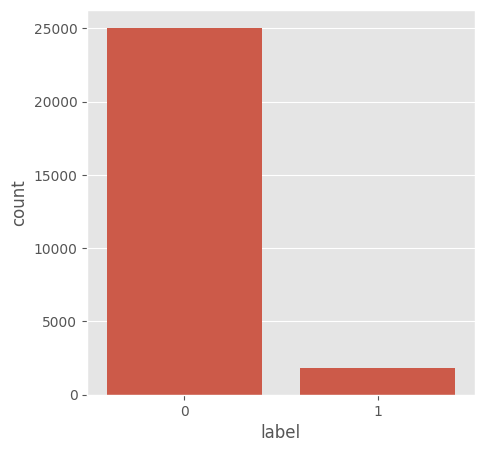

In [111]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='label', data = tweet_df)

Text(0.5, 1.0, 'Distribution of sentiments')

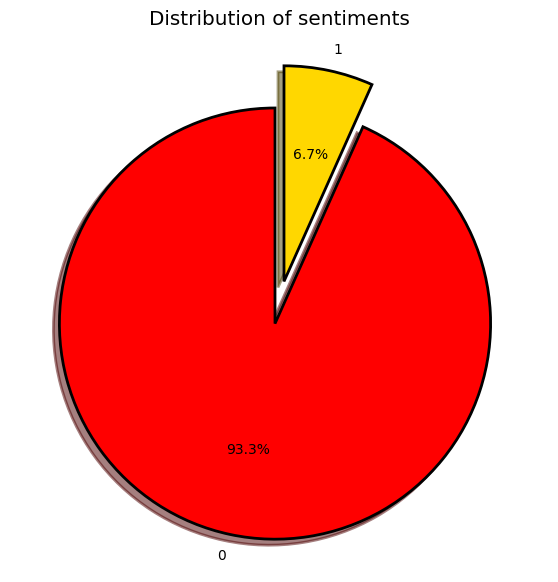

In [112]:
fig = plt.figure(figsize=(7,7))
colors = ("red", "gold")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = tweet_df['label'].value_counts()
explode = (0.1, 0.1)
tags.plot(kind='pie',autopct = '%1.1f%%', shadow=True, colors = colors, startangle =90, 
         wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [113]:
non_hate_tweets = tweet_df[tweet_df.label == 0]
non_hate_tweets.head()

,id,label,tweet
0,1,0,father dysfunctional selfish drag kid dysfunction
1,2,0,thanks credit cant use cause dont offer wheelc...
2,3,0,bihday majesty
3,4,0,love u take u time ur
4,5,0,factsguide society


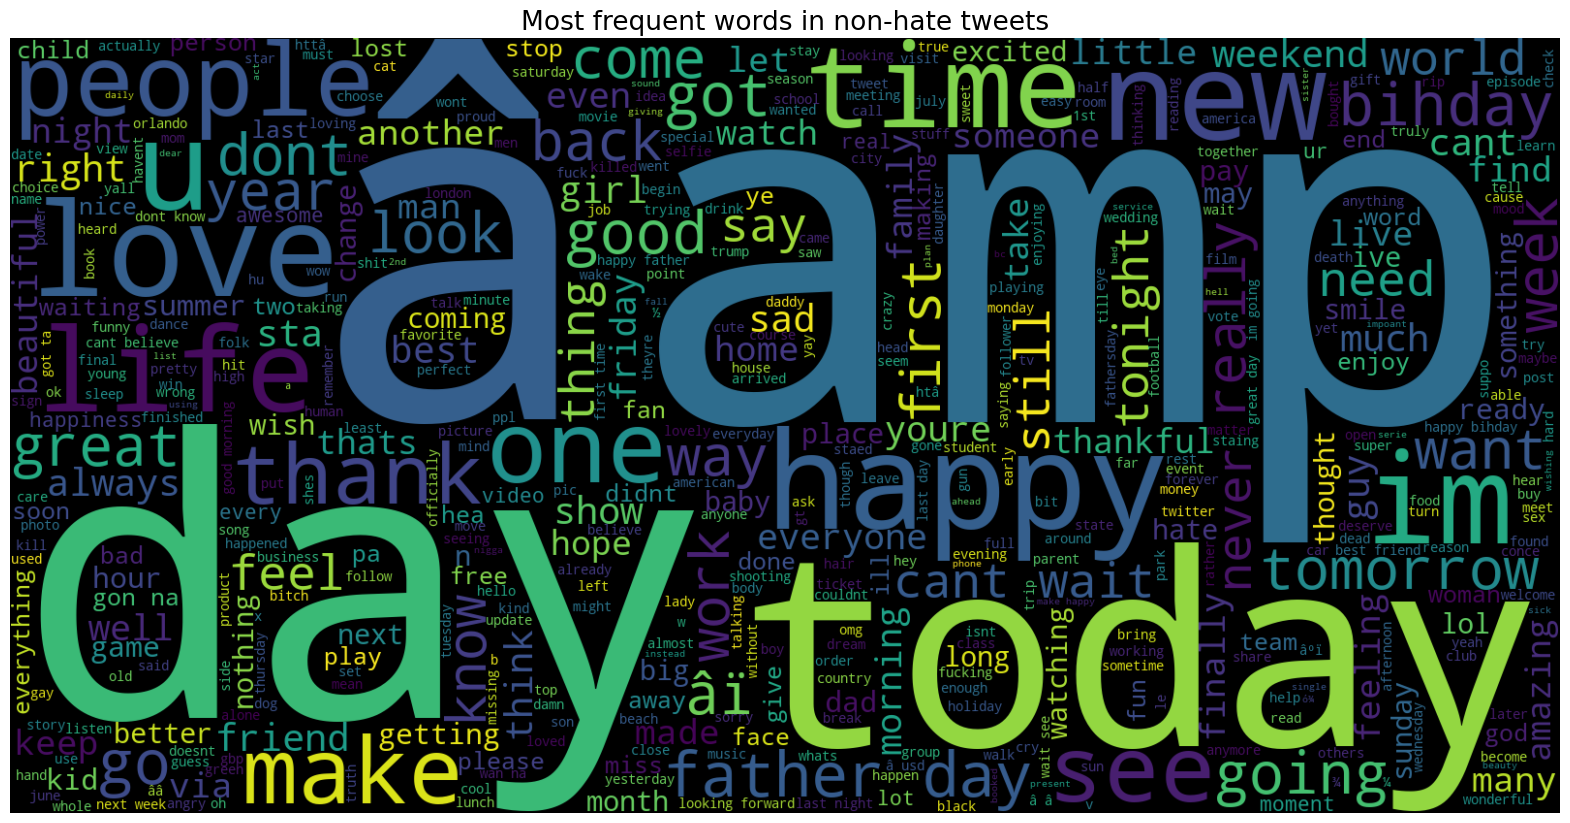

In [114]:
if not isinstance(non_hate_tweets, pd.DataFrame) or non_hate_tweets.empty:
    print("Error: 'non_hate_tweets' is empty or not a DataFrame.")
else:
    if 'tweet' in non_hate_tweets and not non_hate_tweets['tweet'].empty:
        text = ' '.join([str(tweet) for tweet in non_hate_tweets['tweet']])
        plt.figure(figsize=(20, 15), facecolor='None')
        wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Most frequent words in non-hate tweets', fontsize=19)
        plt.show()
    else:
        print("Error: 'tweet' column is empty or missing in 'non_hate_tweets'.")

In [115]:
neg_tweets = tweet_df[tweet_df.label == 1]
neg_tweets.head()

,id,label,tweet
13,14,1,call middle school build wall chant
14,15,1,comment
17,18,1,retweet agree
23,24,1,lumpy say prove lumpy
34,35,1,unbelievable 21st century wed need something like


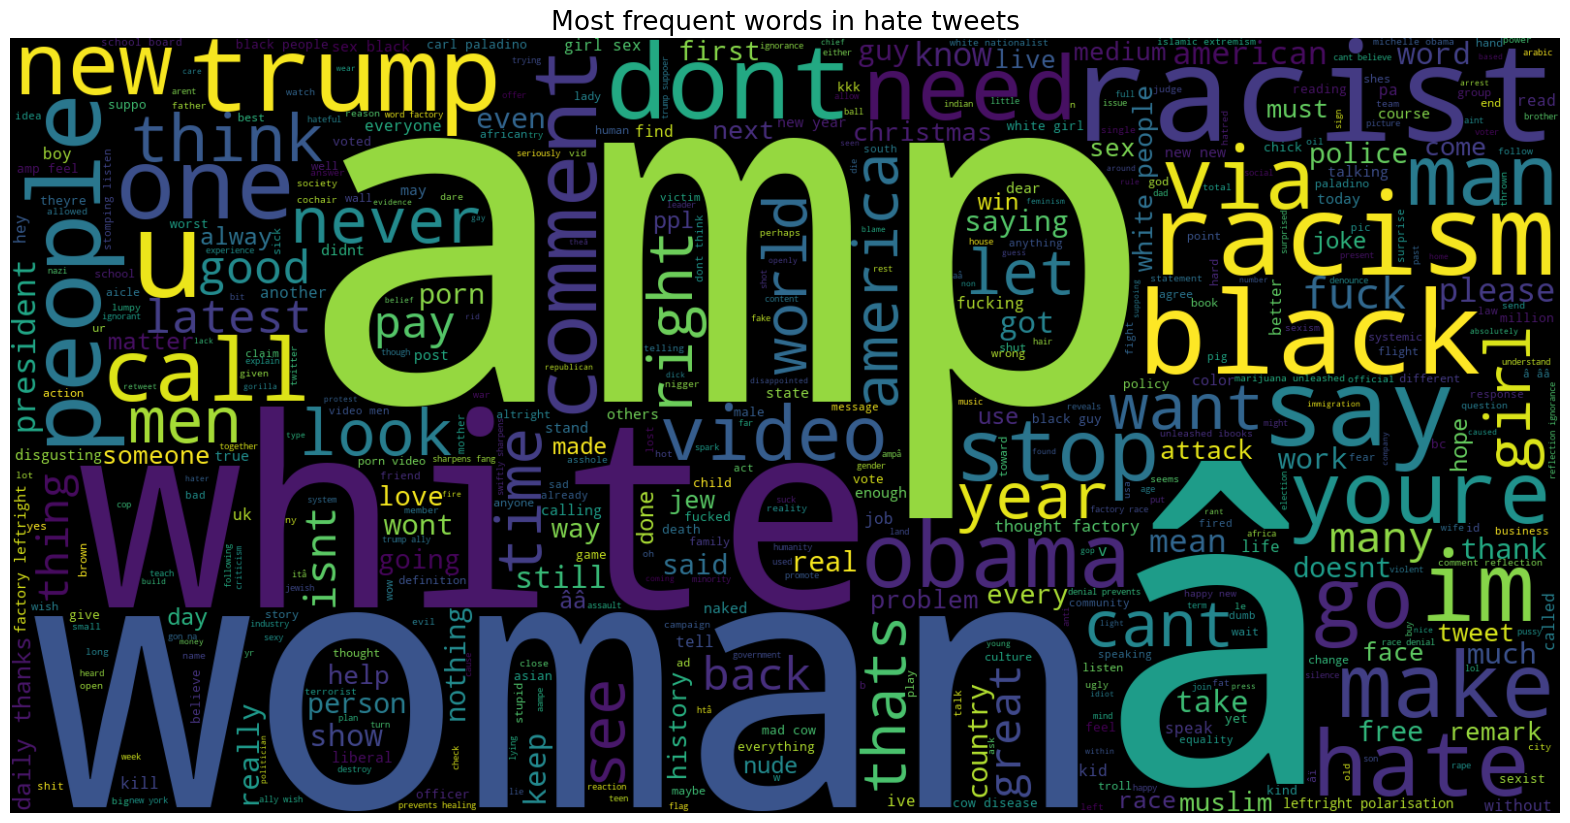

In [116]:
text = ' '.join([word for word in neg_tweets['tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in hate tweets', fontsize = 19)
plt.show()

In [117]:
vect = TfidfVectorizer(ngram_range=(1,2)).fit(tweet_df['tweet'])

In [119]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features: \n{}".format(feature_names[:20]))

Number of features: 128404

First 20 features: 
['000' '0000001' '0000001 polluting' '00027' '001' '0035' '00h30' '01'
 '01 4995' '01 7900' '01 croatia' '01 may' '0115' '0115 8599968' '019'
 '019 previous' '01926889917' '02' '02 05' '02 may']


In [120]:
vect = TfidfVectorizer(ngram_range=(1,3)).fit(tweet_df['tweet'])

In [122]:
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features: \n{}".format(feature_names[:20]))

Number of features: 228877

First 20 features: 
['000' '0000001' '0000001 polluting' '0000001 polluting niger' '00027'
 '001' '0035' '00h30' '01' '01 4995' '01 7900' '01 croatia'
 '01 croatia happy' '01 may' '01 may actual' '01 may previous' '0115'
 '0115 8599968' '019' '019 previous']


In [123]:
X = tweet_df['tweet']
Y = tweet_df['label']
X = vect.transform(X)

In [124]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [125]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train: (21446, 228877)
Size of y_train: (21446,)
Size of x_test:  (5362, 228877)
Size of y_test:  (5362,)


In [126]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_predict = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_predict, y_test)
print("Test accuarcy: {:.2f}%".format(logreg_acc*100))

Test accuarcy: 93.12%


In [127]:
print(confusion_matrix(y_test, logreg_predict))
print("\n")
print(classification_report(y_test, logreg_predict))

[[4987    1]
 [ 368    6]]


              precision    recall  f1-score   support

           0       0.93      1.00      0.96      4988
           1       0.86      0.02      0.03       374

    accuracy                           0.93      5362
   macro avg       0.89      0.51      0.50      5362
weighted avg       0.93      0.93      0.90      5362



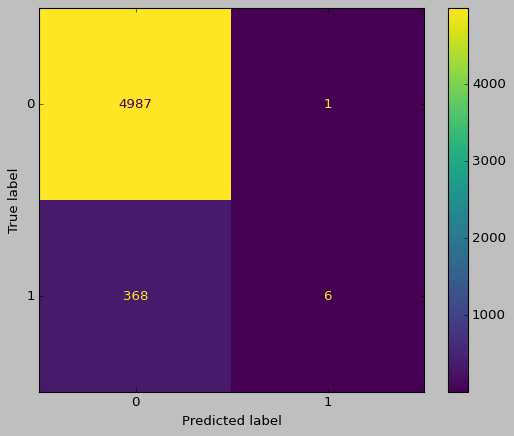

In [128]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_predict, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()

In [129]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [130]:
param_grid = {'C':[100, 10, 1.0, 0.1, 0.01], 'solver' :['newton-cg', 'lbfgs','liblinear']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
grid.fit(x_train, y_train)
print("Best Cross validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best Cross validation score: 0.94
Best parameters:  {'C': 100, 'solver': 'newton-cg'}


In [131]:
y_pred = grid.predict(x_test)

In [134]:
logreg_acc = accuracy_score(y_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 93.98%
